<a href="https://colab.research.google.com/github/BillWang04/CSE151A-Group-Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [84]:
business = pd.read_csv('data/business.csv')
economy = pd.read_csv('data/economy.csv')

In [85]:
def clean(df, class_):
    def extract_stops(description):
        stops_match = re.search(r'(\d+)-?stop', description)
        if stops_match:
            return int(stops_match.group(1))
        else:
            return 0
    def duration_to_hours(duration):
        hours, minutes = duration.split('h ')
        hours = float(hours.strip()) if len(hours.strip()) > 1 else 0
        minutes = int(minutes[:-1].strip()) if len(minutes.strip()) > 1 else 0
        total_hours = hours + minutes / 60
        return round(total_hours, 3)
    df_copy = df.copy()
    df_copy["price"] = df_copy["price"].str.replace("," , "").astype(int)
    df_copy["flight_code"] = df_copy["ch_code"].astype(str).str.cat(df_copy["num_code"].astype(str), sep="_")
    df_copy['num_stops'] = df_copy['stop'].apply(extract_stops)
    df_copy["time_taken"] = df_copy["time_taken"].apply(duration_to_hours)
    df_copy['date'] = pd.to_datetime(df_copy['date'], format="%d-%m-%Y")
    df_copy['day_of_week'] = df_copy['date'].dt.dayofweek
    df_copy['month'] = df_copy['date'].dt.month
    df_copy['arr_time'] = pd.to_datetime(df_copy['arr_time'])
    df_copy['arr_time'] = df_copy['arr_time'].dt.hour + (df_copy['arr_time'].dt.minute >= 30)
    df_copy['dep_time'] = pd.to_datetime(df_copy['dep_time'])
    df_copy['dep_time'] = df_copy['dep_time'].dt.hour + (df_copy['dep_time'].dt.minute >= 30)
    df_copy = df_copy.drop(columns= ["date", "ch_code", "num_code", "stop"])
    df_copy["class"] = class_
    df_copy = df_copy[["airline", "flight_code", "class", "from", "to", "time_taken", "dep_time", "arr_time", "num_stops", "month", "day_of_week", "price"]]
    return df_copy



In [86]:
cleaned_df = pd.concat([clean(economy, "economy"), clean(business, "business")])
cleaned_df

/var/folders/0b/lv5l941x1vd5qs6_pqc8vh8h0000gn/T/ipykernel_99600/2232736731.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['arr_time'] = pd.to_datetime(df_copy['arr_time'])
/var/folders/0b/lv5l941x1vd5qs6_pqc8vh8h0000gn/T/ipykernel_99600/2232736731.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['dep_time'] = pd.to_datetime(df_copy['dep_time'])
/var/folders/0b/lv5l941x1vd5qs6_pqc8vh8h0000gn/T/ipykernel_99600/2232736731.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['arr_time'] = pd.to_datetime(df_copy['arr_time'])
/var/folders/0b/lv5

,airline,flight_code,class,from,to,time_taken,dep_time,arr_time,num_stops,month,day_of_week,price
0,SpiceJet,SG_8709,economy,Delhi,Mumbai,2.167,19,21,0,2,4,5953
1,SpiceJet,SG_8157,economy,Delhi,Mumbai,2.333,6,9,0,2,4,5953
2,AirAsia,I5_764,economy,Delhi,Mumbai,2.167,4,7,0,2,4,5956
3,Vistara,UK_995,economy,Delhi,Mumbai,2.250,10,13,0,2,4,5955
4,Vistara,UK_963,economy,Delhi,Mumbai,2.333,9,11,0,2,4,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,Vistara,UK_822,business,Chennai,Hyderabad,10.083,10,20,1,3,3,69265
93483,Vistara,UK_826,business,Chennai,Hyderabad,10.417,13,23,1,3,3,77105
93484,Vistara,UK_832,business,Chennai,Hyderabad,13.833,7,21,1,3,3,79099
93485,Vistara,UK_828,business,Chennai,Hyderabad,10.000,7,17,1,3,3,81585


In [5]:
cleaned_df.describe()

,time_taken,dep_time,arr_time,num_stops,month,day_of_week,price
count,300261.000000,300261.000000,300261.00000,300261.000000,300261.000000,300261.000000,300261.000000
mean,12.217291,13.509850,15.80090,0.835703,2.664995,2.954656,20883.717666
std,7.193560,5.412152,6.05027,0.370546,0.471993,2.003251,22695.911266
min,0.333000,0.000000,0.00000,0.000000,2.000000,0.000000,1105.000000
25%,6.750000,9.000000,11.00000,1.000000,2.000000,1.000000,4783.000000
50%,11.250000,13.000000,17.00000,1.000000,3.000000,3.000000,7425.000000
75%,16.167000,19.000000,21.00000,1.000000,3.000000,5.000000,42521.000000
max,49.833000,24.000000,24.00000,1.000000,3.000000,6.000000,123071.000000


Let's first visualize the number of flights by Airline within our dataset.

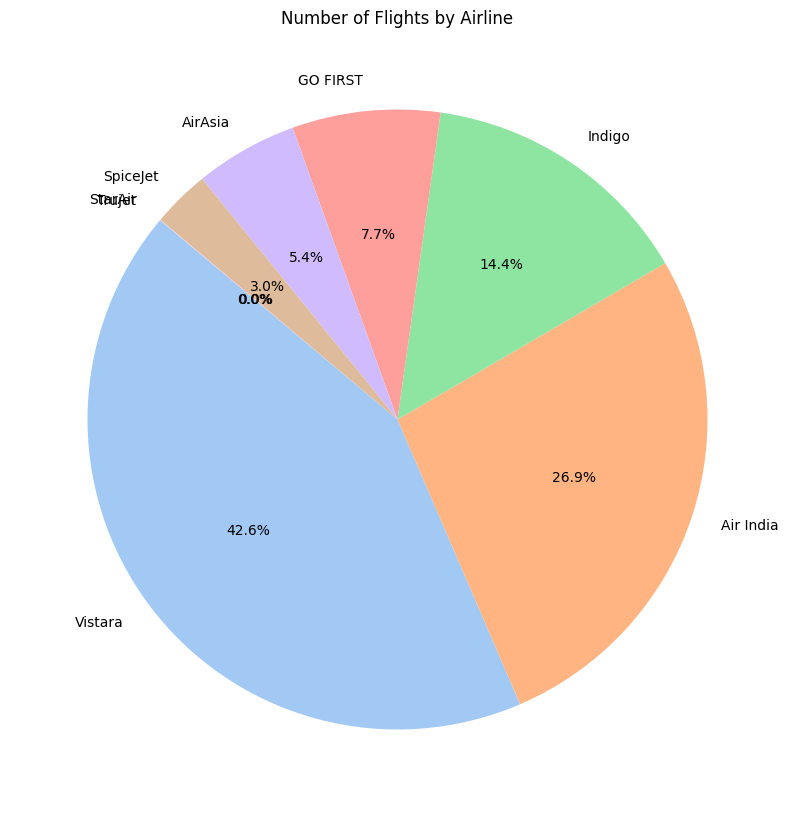

In [6]:
plt.figure(figsize=(10, 15))
airline_counts = cleaned_df['airline'].value_counts()
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Number of Flights by Airline')
plt.show()

In [7]:
cleaned_df['airline'].value_counts()

airline
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64

It looks like Vistara has by far the most flight data, making up almost half of our dataset, while Trujet and StarAir have very little data (less than 1% of our dataset).

Is there variation in flight prices depending on the day of the week?

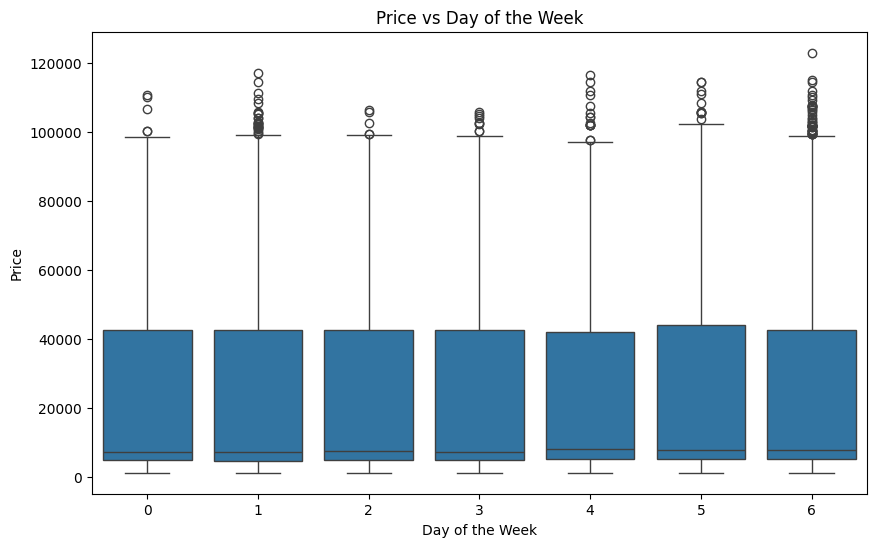

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='price', data=cleaned_df)
plt.title('Price vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Price')
plt.show()

It looks like flight prices are generally relatively stable regardless of the day of the week, with similar distributions for each day. However, this does not take into account differences in pricing between different airlines. If we look at a specific airline, Vistara, does this change?

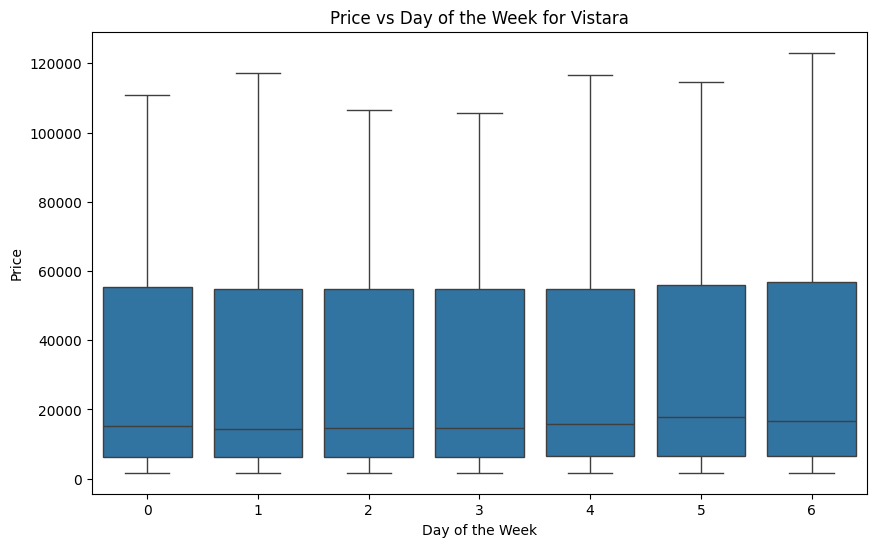

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='price', data=cleaned_df[cleaned_df['airline'] == 'Vistara'])
plt.title('Price vs Day of the Week for Vistara')
plt.xlabel('Day of the Week')
plt.ylabel('Price')
plt.show()

We can see more clearly that the median prices are relatively stable, with the most expensive flights being toward the weekend rather than in the middle of the week. Compared to the combined data for all airlines, we see that the median price for each day is significantly higher (closer to 20000), which indicates that Vistara has generally more expensive flights than other airlines.

We can take a look at the distribution of prices by airline.

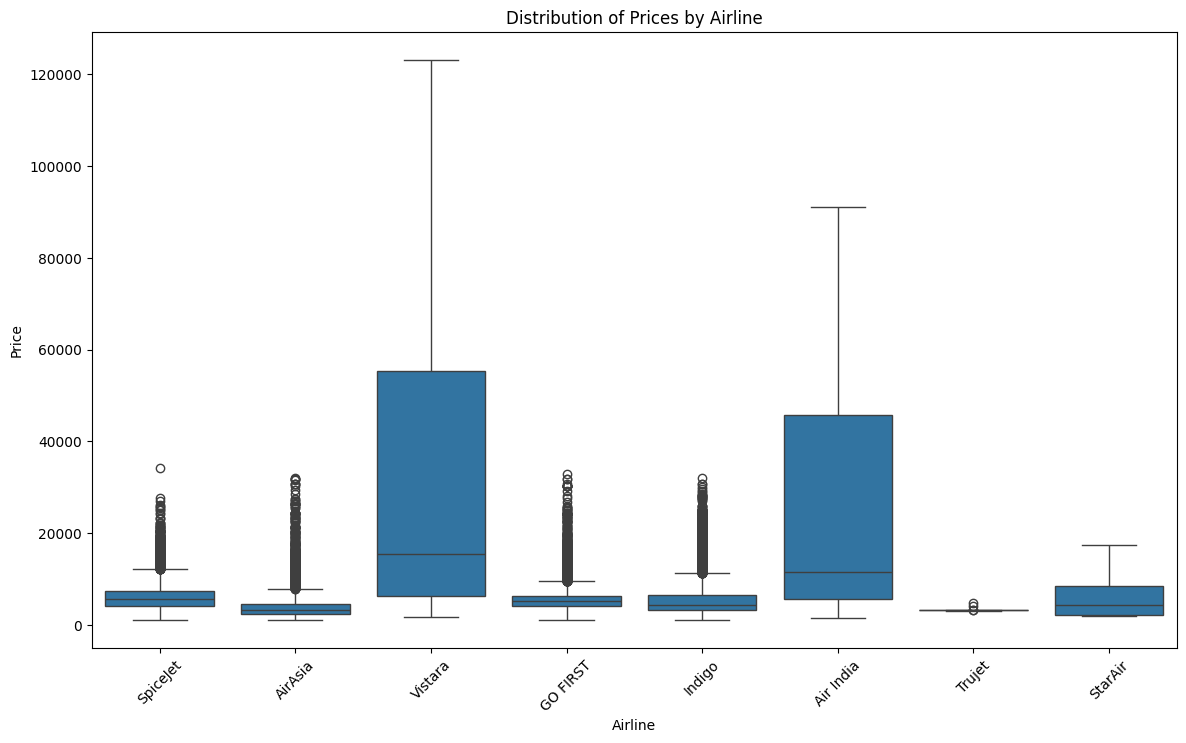

In [10]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='airline', y='price', data=cleaned_df)
plt.title('Distribution of Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Here, we can see that Vistara and Air India have the most expensive flights, with a larger range of flight prices. For all airlines, the median price is below 20000.

In [11]:
cleaned_df['month'].value_counts()

month
3    199672
2    100589
Name: count, dtype: int64

It looks like all of our flight data comes from either February or March, and there is more data on flights from March and February.

Let's see if there are any patterns with departure time and pricing.

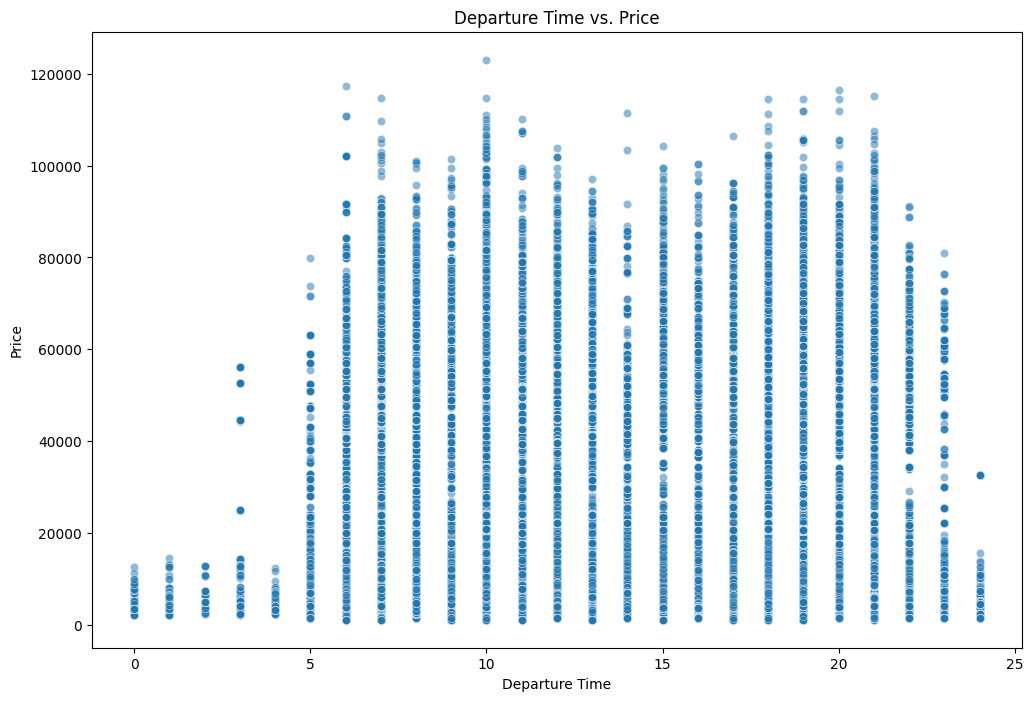

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='dep_time', y='price', data=cleaned_df, alpha=0.5)
plt.title('Departure Time vs. Price')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.show()

We can see that flights the depart between around 11pm-5am are significantly rarer and cheaper than other departure times.

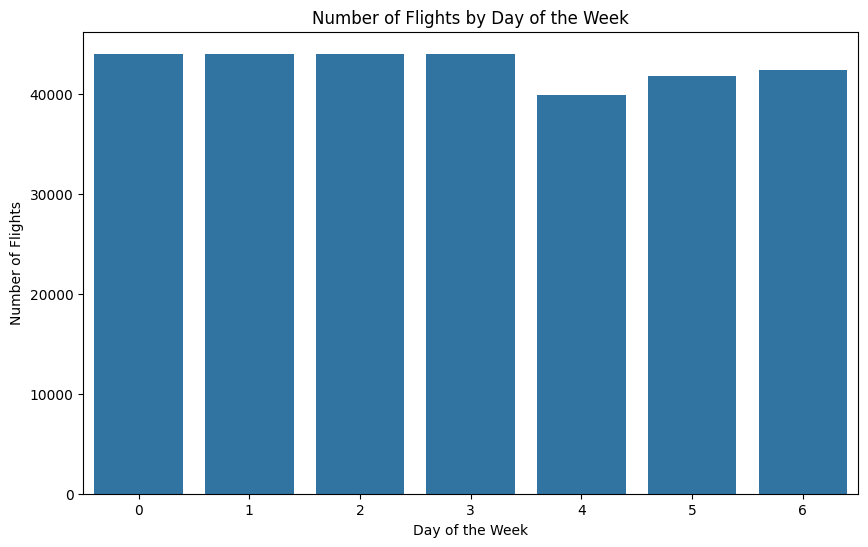

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=cleaned_df)
plt.title('Number of Flights by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.show()

Given this bar chart, it seems that we have around the same amount of flight data for every day of the week.

### PairPlot and Correlation Matrix

In [14]:
cleaned_df.dtypes

airline         object
flight_code     object
class           object
from            object
to              object
time_taken     float64
dep_time         int32
arr_time         int32
num_stops        int64
month            int32
day_of_week      int32
price            int64
dtype: object

<AxesSubplot:>

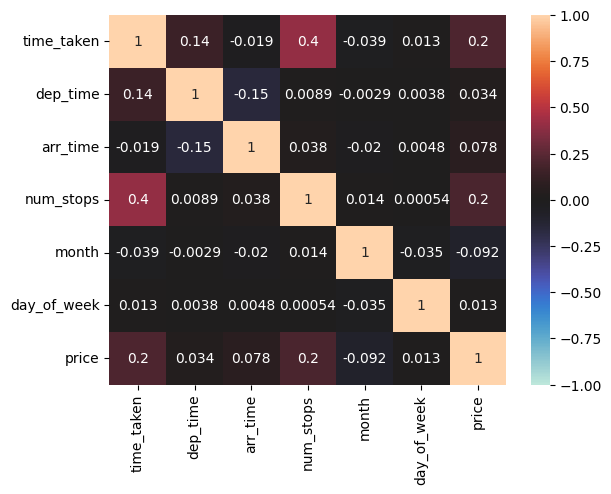

In [15]:
# drop the qualitative data
quantidata = cleaned_df.drop(columns = ['airline','flight_code','class','from','to'])

corr = quantidata.corr()
sns.heatmap(corr, annot = True, vmin=-1,vmax=1,center=0)

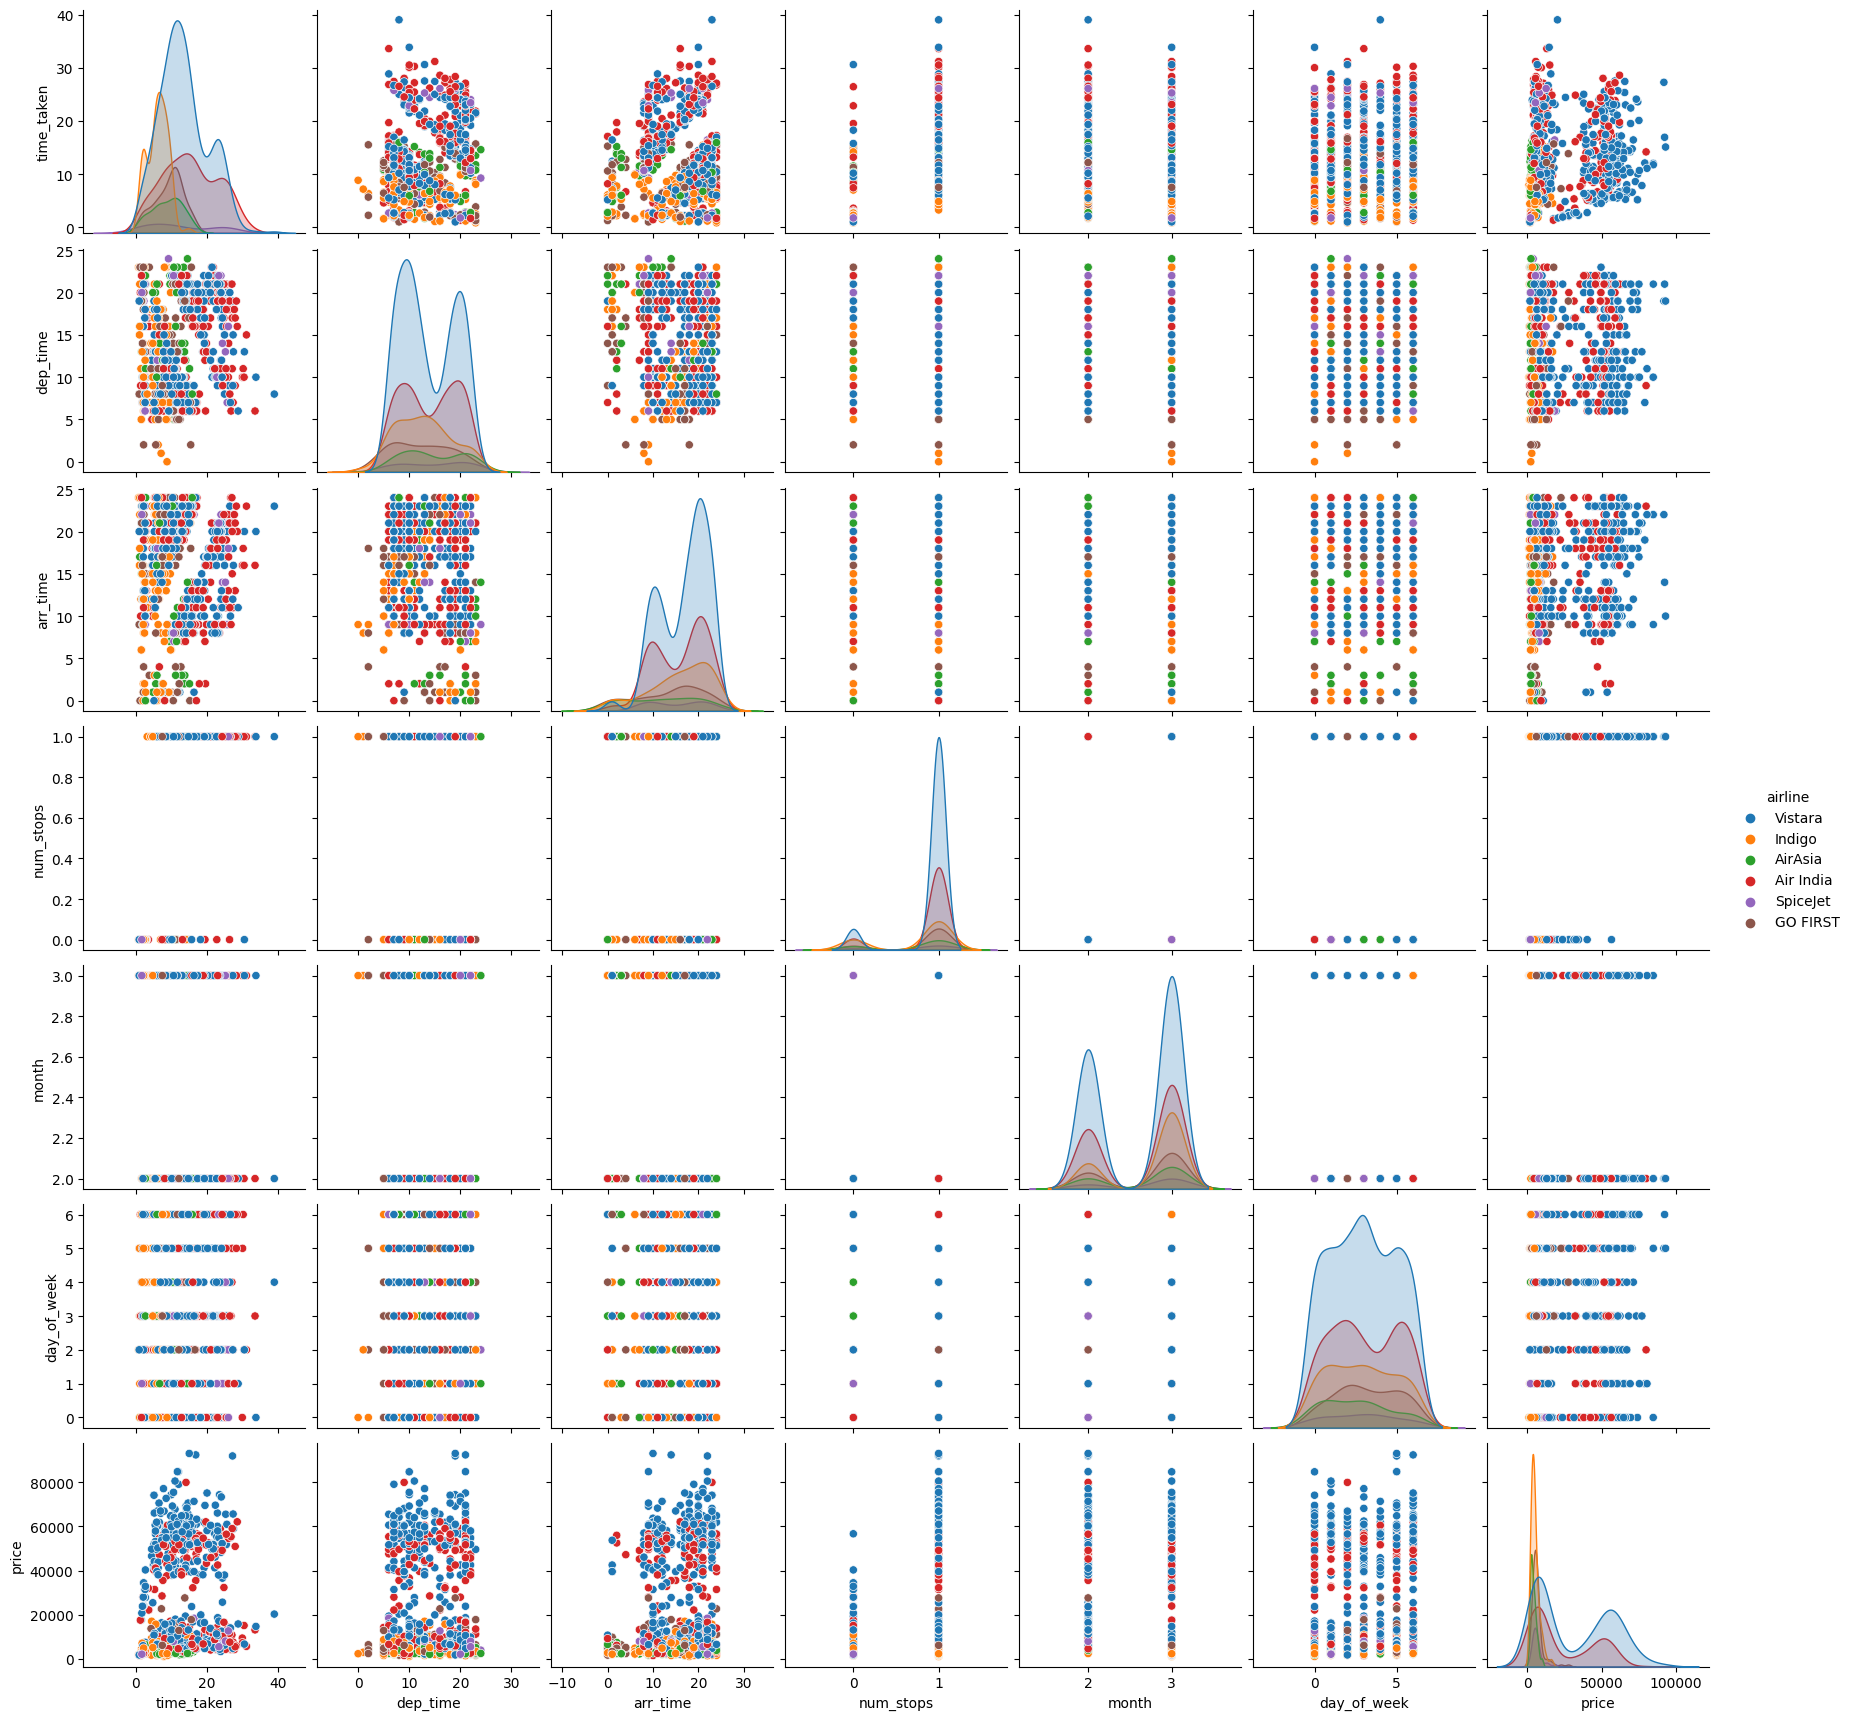

In [16]:
num_samples = 1000
sampled_df = cleaned_df.sample(n=num_samples,random_state=42)
sns.pairplot(sampled_df, hue="airline")

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=cleaned_df, x='dep_time', y='price', hue='class')

plt.title('Flight Prices Over Time by Class')
plt.xlabel('Departure Date')
plt.ylabel('Price')
plt.legend(title='Class')

# **Preprocess the data**

In [16]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# quantidata = df with only numerical categories
#One Hot Encode (Y)
oneHot = OneHotEncoder()
oneHot_classes = oneHot.fit_transform(cleaned_df.airline.values.reshape(-1,1)).toarray()
y = oneHot_classes

#Normalize the data
#classed_dropped = cleaned_df.drop(columns= ['class', 'airline', 'flight_code', 'from', 'to'])

norm_scaler = MinMaxScaler()
normalized_data = norm_scaler.fit_transform(quantidata)

#Standardize the data
stand_scaler = StandardScaler()
standardized_data = stand_scaler.fit_transform(quantidata)

In [17]:
oneHot_classes[1]

array([0., 0., 0., 0., 1., 0., 0., 0.])

In [18]:
pd.DataFrame(normalized_data)

,0,1,2,3,4,5,6
0,0.037051,0.791667,0.875000,0.0,0.0,0.666667,0.039749
1,0.040404,0.250000,0.375000,0.0,0.0,0.666667,0.039749
2,0.037051,0.166667,0.291667,0.0,0.0,0.666667,0.039773
3,0.038727,0.416667,0.541667,0.0,0.0,0.666667,0.039765
4,0.040404,0.375000,0.458333,0.0,0.0,0.666667,0.039765
...,...,...,...,...,...,...,...
300256,0.196970,0.416667,0.833333,1.0,1.0,0.500000,0.558844
300257,0.203717,0.541667,0.958333,1.0,1.0,0.500000,0.623124
300258,0.272727,0.291667,0.875000,1.0,1.0,0.500000,0.639473
300259,0.195293,0.291667,0.708333,1.0,1.0,0.500000,0.659856


In [19]:
quantidata

,time_taken,dep_time,arr_time,num_stops,month,day_of_week,price
0,2.167,19,21,0,2,4,5953
1,2.333,6,9,0,2,4,5953
2,2.167,4,7,0,2,4,5956
3,2.250,10,13,0,2,4,5955
4,2.333,9,11,0,2,4,5955
...,...,...,...,...,...,...,...
93482,10.083,10,20,1,3,3,69265
93483,10.417,13,23,1,3,3,77105
93484,13.833,7,21,1,3,3,79099
93485,10.000,7,17,1,3,3,81585


In [20]:
cleaned_df.airline.value_counts()

airline
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

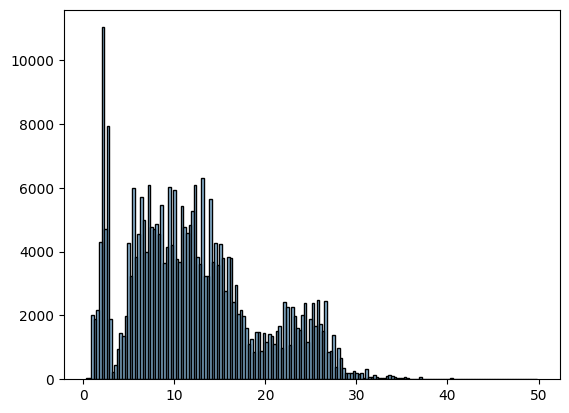

In [21]:
sns.histplot(cleaned_df['time_taken'], kde=True)

<AxesSubplot:xlabel='time_taken', ylabel='Count'>

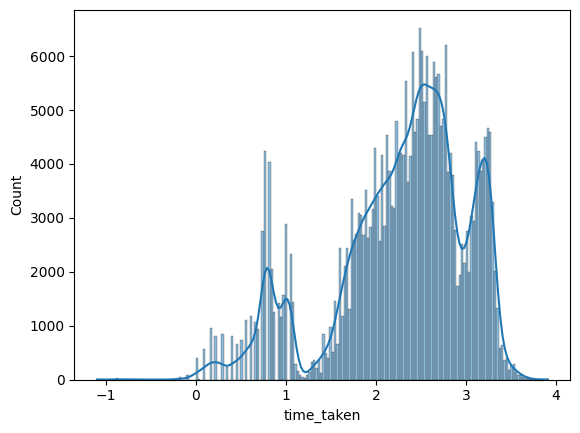

In [ ]:
sns.histplot(cleaned_df['time_taken'].apply(np.log), kde=True)

In [ ]:
cleaned_df[cleaned_df['airline'] == 'StarAir']

,airline,flight_code,class,from,to,time_taken,dep_time,arr_time,num_stops,month,day_of_week,price
109730,StarAir,S5_151,economy,Bangalore,Hyderabad,1.000,7,8,0,2,5,4337
109764,StarAir,S5_131,economy,Bangalore,Hyderabad,5.083,15,20,1,2,5,11382
110001,StarAir,S5_151,economy,Bangalore,Hyderabad,1.000,7,8,0,2,1,4337
110098,StarAir,S5_131,economy,Bangalore,Hyderabad,5.083,15,20,1,2,1,17482
110430,StarAir,S5_151,economy,Bangalore,Hyderabad,1.000,7,8,0,2,5,4337
...,...,...,...,...,...,...,...,...,...,...,...,...
169904,StarAir,S5_152,economy,Hyderabad,Bangalore,1.083,20,21,0,3,3,2115
169988,StarAir,S5_150,economy,Hyderabad,Bangalore,5.083,9,14,1,3,3,9582
170131,StarAir,S5_152,economy,Hyderabad,Bangalore,1.083,20,21,0,3,5,2115
170514,StarAir,S5_152,economy,Hyderabad,Bangalore,1.083,20,21,0,3,1,2115


In [22]:
cleaned_df.day_of_week.value_counts()

day_of_week
0    44073
1    44041
2    44023
3    44022
6    42399
5    41809
4    39894
Name: count, dtype: int64

In [23]:
cleaned_df

,airline,flight_code,class,from,to,time_taken,dep_time,arr_time,num_stops,month,day_of_week,price
0,SpiceJet,SG_8709,economy,Delhi,Mumbai,2.167,19,21,0,2,4,5953
1,SpiceJet,SG_8157,economy,Delhi,Mumbai,2.333,6,9,0,2,4,5953
2,AirAsia,I5_764,economy,Delhi,Mumbai,2.167,4,7,0,2,4,5956
3,Vistara,UK_995,economy,Delhi,Mumbai,2.250,10,13,0,2,4,5955
4,Vistara,UK_963,economy,Delhi,Mumbai,2.333,9,11,0,2,4,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,Vistara,UK_822,business,Chennai,Hyderabad,10.083,10,20,1,3,3,69265
93483,Vistara,UK_826,business,Chennai,Hyderabad,10.417,13,23,1,3,3,77105
93484,Vistara,UK_832,business,Chennai,Hyderabad,13.833,7,21,1,3,3,79099
93485,Vistara,UK_828,business,Chennai,Hyderabad,10.000,7,17,1,3,3,81585


## Modeling

### Linear Regression

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

cleaned_df['weekend'] = cleaned_df['day_of_week'] > 4

X_train, X_test, y_train, y_test = train_test_split(cleaned_df.drop(columns=['price']), cleaned_df['price'], test_size=0.2, random_state=66)


prepoc = ColumnTransformer([
    ('airline', OneHotEncoder(handle_unknown='ignore'), ['airline', 'class']), #comment out for baseline
    ('log', FunctionTransformer(lambda x: np.log(x + 0.001)), ['time_taken']), # comment out for baseline
    # ('square', FunctionTransformer(lambda x: x**2), ['RES.PRICE']),
    ('test', FunctionTransformer(lambda x: x), ['dep_time', 'arr_time', 'num_stops', 'weekend']),
    # ('test', FunctionTransformer(lambda x: x), ['TOTAL.PRICE', 'OUTAGE.DURATION']), #baseline
], remainder='drop')

pipe = Pipeline([
        ('prepoc', prepoc),
        ('pog', LinearRegression())
    ])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# # Predict on the testing data
predictions = pipe.predict(X_test)



In [32]:
train_predictions = pipe.predict(X_train)

RMSE_test = np.sqrt(np.sum((y_test - predictions)**2) / y_test.shape[0])
RMSE_train = np.sqrt(np.sum((y_train - train_predictions)**2) / y_train.shape[0])
RMSE_train

7193.054746715674

In [33]:
RMSE_test

7242.05710648803

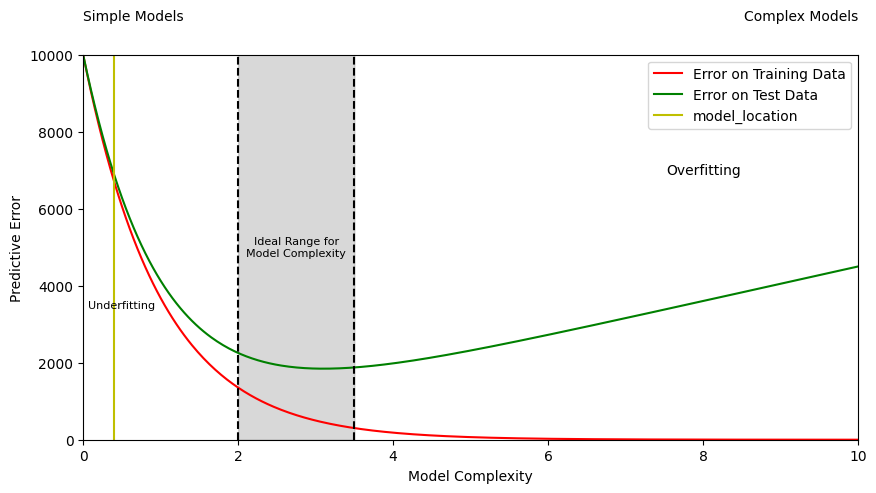

In [34]:
model_complexity = np.linspace(0, 10, 400)

training_error = 10000 * np.exp(-model_complexity) 
test_error = 10000 * np.exp(-model_complexity) + 4500 * (model_complexity / 10)

plt.figure(figsize=(10, 5))

plt.plot(model_complexity, training_error, 'r', label='Error on Training Data')
plt.plot(model_complexity, test_error, 'g', label='Error on Test Data')

plt.axvline(x=2, color='k', linestyle='--')
plt.axvline(x=3.5, color='k', linestyle='--')
plt.axvline(x=0.4, color='y', label="model_location")
plt.fill_betweenx(np.arange(0, 10000), 2, 3.5, color='grey', alpha=0.3)

plt.text(2.75, 5000, 'Ideal Range for\nModel Complexity', horizontalalignment='center', verticalalignment='center', fontdict={'size': 8})
plt.text(0.5, 3500, 'Underfitting', horizontalalignment='center', verticalalignment='center', fontdict={'size': 8})
plt.text(8, 7000, 'Overfitting', horizontalalignment='center', verticalalignment='center')
plt.text(0, 11000, 'Simple Models', horizontalalignment='left', verticalalignment='center')
plt.text(10, 11000, 'Complex Models', horizontalalignment='right', verticalalignment='center')

plt.xlabel('Model Complexity')
plt.ylabel('Predictive Error')

plt.xlim(0, 10)
plt.ylim(0, 10000)
plt.legend()

plt.show()


The next two models we were thinking about using are ridge regression and random forest regression. We are considering ridge regression because it uses regularization to prevent overfitting and penalizes large coefficients to reduce model complexity and improve generalization. Ridge regression is also very useful when dealing with multicollinearity within the features. The second model we were thinking about using is random forest regression because random forest regression is less prone to overfitting, as each tree in the random forest is trained on a random subset of the training data and a random subset of features. Random forest regression is useful for capturing nonlinear relationships between features and the target variable.

In [35]:
from sklearn.ensemble import RandomForestRegressor

#### Random Forest Regression


In [36]:
prepoc = ColumnTransformer([
    ('airline', OneHotEncoder(handle_unknown='ignore'), ['airline', 'class']), #One Hot Encoding airline and class
    ('log', FunctionTransformer(lambda x: np.log(x + 0.001)), ['time_taken']), # Loging Time Taken 
    ('test', FunctionTransformer(lambda x: x), ['dep_time', 'arr_time', 'num_stops', 'weekend']), # Keeping all of the values 
], remainder='drop')

pipe = Pipeline([
        ('prepoc', prepoc),
        ('pog', RandomForestRegressor())
    ])

pipe.fit(X_train, y_train)

predictions = pipe.predict(X_test)

In [37]:
train_predictions = pipe.predict(X_train)

RMSE_test = np.sqrt(np.sum((y_test - predictions)**2) / y_test.shape[0])
RMSE_train = np.sqrt(np.sum((y_train - train_predictions)**2) / y_train.shape[0])
print(f'RMSE Test: { RMSE_test }')
print(f'RMSE Train: { RMSE_train }')

RMSE Test: 4126.950091324907
RMSE Train: 3768.614335146322


In [38]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint


# params = {
#     'pog__n_estimators': [50, 75, 100, 125, 150, 200, 250, 300], 
#     'pog__max_features': [1, 3, 5, 7, 9, 12, 15, 18, 20], 
#     'pog__min_samples_split': [2, 5, 8, 10, 12, 15]
# }

# grid_search = RandomizedSearchCV(estimator=pipe, param_grid=params, cv=5)
# grid_search.fit(X_train, y_train)

param_dist = {
    'pog__n_estimators': randint(50, 300),
    'pog__max_features': randint(1, 20),
    'pog__min_samples_split': randint(2, 15)
}

random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=10, 
    cv=5,     
    scoring='neg_mean_squared_error',  
    verbose=1,
    n_jobs=-1,
    random_state=66   
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/ahmostafa/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ahmostafa/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ahmostafa/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/ahmostafa/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/ensemble/_

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prepoc',
                                              ColumnTransformer(transformers=[('airline',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['airline',
                                                                                'class']),
                                                                              ('log',
                                                                               FunctionTransformer(func=<function <lambda> at 0x2c0153280>),
                                                                               ['time_taken']),
                                                                              ('test',
                                                                               FunctionTransformer(func=<function <lam

In [39]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'prepoc', 'pog', 'prepoc__n_jobs', 'prepoc__remainder', 'prepoc__sparse_threshold', 'prepoc__transformer_weights', 'prepoc__transformers', 'prepoc__verbose', 'prepoc__verbose_feature_names_out', 'prepoc__airline', 'prepoc__log', 'prepoc__test', 'prepoc__airline__categories', 'prepoc__airline__drop', 'prepoc__airline__dtype', 'prepoc__airline__handle_unknown', 'prepoc__airline__sparse', 'prepoc__log__accept_sparse', 'prepoc__log__check_inverse', 'prepoc__log__func', 'prepoc__log__inv_kw_args', 'prepoc__log__inverse_func', 'prepoc__log__kw_args', 'prepoc__log__validate', 'prepoc__test__accept_sparse', 'prepoc__test__check_inverse', 'prepoc__test__func', 'prepoc__test__inv_kw_args', 'prepoc__test__inverse_func', 'prepoc__test__kw_args', 'prepoc__test__validate', 'pog__bootstrap', 'pog__ccp_alpha', 'pog__criterion', 'pog__max_depth', 'pog__max_features', 'pog__max_leaf_nodes', 'pog__max_samples', 'pog__min_impurity_decrease', 'pog__min_samples_leaf'

In [40]:
random_search.best_params_

{'pog__max_features': 2,
 'pog__min_samples_split': 14,
 'pog__n_estimators': 249}

In [41]:
best_params = {
    'n_estimators': 249,
    'max_features': 2,
    'min_samples_split': 14
}

pipe = Pipeline([
        ('prepoc', prepoc),
        ('pog', RandomForestRegressor(**best_params))
    ])

pipe.fit(X_train, y_train)

# # Predict on the testing data
predictions = pipe.predict(X_test)

In [42]:
train_predictions = pipe.predict(X_train)

RMSE_test = np.sqrt(np.sum((y_test - predictions)**2) / y_test.shape[0])
RMSE_train = np.sqrt(np.sum((y_train - train_predictions)**2) / y_train.shape[0])
RMSE_test

4180.6972074176865

In [43]:
RMSE_train

3861.602650618266

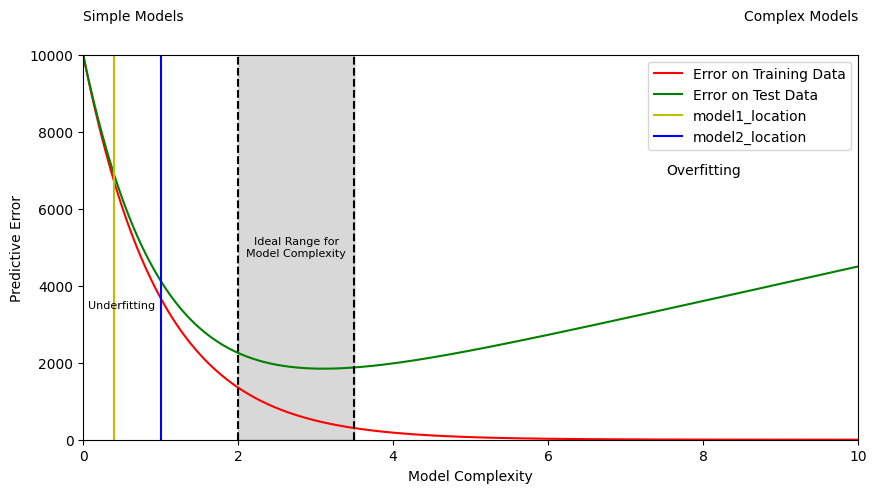

In [47]:
model_complexity = np.linspace(0, 10, 400)

training_error = 10000 * np.exp(-model_complexity) 
test_error = 10000 * np.exp(-model_complexity) + 4500 * (model_complexity / 10)

plt.figure(figsize=(10, 5))

plt.plot(model_complexity, training_error, 'r', label='Error on Training Data')
plt.plot(model_complexity, test_error, 'g', label='Error on Test Data')

plt.axvline(x=2, color='k', linestyle='--')
plt.axvline(x=3.5, color='k', linestyle='--')
plt.axvline(x=0.4, color='y', label="model1_location")
plt.axvline(x=1.0, color='b', label="model2_location")
plt.fill_betweenx(np.arange(0, 10000), 2, 3.5, color='grey', alpha=0.3)

plt.text(2.75, 5000, 'Ideal Range for\nModel Complexity', horizontalalignment='center', verticalalignment='center', fontdict={'size': 8})
plt.text(0.5, 3500, 'Underfitting', horizontalalignment='center', verticalalignment='center', fontdict={'size': 8})
plt.text(8, 7000, 'Overfitting', horizontalalignment='center', verticalalignment='center')
plt.text(0, 11000, 'Simple Models', horizontalalignment='left', verticalalignment='center')
plt.text(10, 11000, 'Complex Models', horizontalalignment='right', verticalalignment='center')

plt.xlabel('Model Complexity')
plt.ylabel('Predictive Error')

plt.xlim(0, 10)
plt.ylim(0, 10000)
plt.legend()

plt.show()

In [26]:
from xgboost import XGBRegressor

In [30]:
X_train

,airline,flight_code,class,from,to,time_taken,dep_time,arr_time,num_stops,month,day_of_week,weekend
116468,Indigo,6E_6212,economy,Bangalore,Chennai,1.083,11,12,0,2,2,False
89073,Indigo,6E_886,economy,Bangalore,Delhi,8.833,9,18,1,3,1,False
79984,Vistara,UK_876,business,Hyderabad,Chennai,22.333,22,20,1,3,5,True
88891,Vistara,UK_826,business,Chennai,Bangalore,6.750,13,19,1,3,4,False
14697,Indigo,6E_2005,economy,Delhi,Bangalore,8.833,10,19,1,3,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
186202,GO FIRST,G8_304,economy,Chennai,Delhi,11.083,14,1,1,3,1,False
136271,Vistara,UK_708,economy,Kolkata,Bangalore,14.417,20,11,1,2,3,False
62586,Vistara,UK_970,economy,Mumbai,Kolkata,9.333,9,18,1,2,4,False
139315,Indigo,6E_6021,economy,Kolkata,Bangalore,6.833,14,21,1,3,3,False


In [98]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import random
from scipy.stats import randint
pipe = Pipeline([
        ('prepoc', prepoc),
        ('pog', XGBRegressor(n_estimators=150, learning_rate=0.08, max_depth=20, random_state = 22))
    ])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


RMSE_test = np.sqrt(np.sum((y_test - y_pred)**2) / y_test.shape[0])
RMSE_train = np.sqrt(np.sum((y_train - pipe.predict(X_train))**2) / y_train.shape[0])
print(RMSE_train)
print("Mean Squared Error:", RMSE_test)

3873.6988212916344
Mean Squared Error: 4225.379033266992


In [57]:
random_search.best_params_


{'pog__learning_rate': 0.202984945067555,
 'pog__max_depth': 9,
 'pog__n_estimators': 366}

In [58]:
y_pred = random_search.best_estimator_.predict(X_test)
RMSE_test = np.sqrt(np.sum((y_test - y_pred)**2) / y_test.shape[0])
RMSE_test

4191.894535380441

In [61]:
param_grid = {'pog__n_estimators': [80, 120, 160, 250],
              'pog__learning_rate': [0.2, 0.1, 0.01, 0.001],
              'pog__max_depth': [5, 7, 10, 15]}

# Initialize the SVM classifier

# Initialize GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prepoc',
                                        ColumnTransformer(transformers=[('airline',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['airline',
                                                                          'class']),
                                                                        ('log',
                                                                         FunctionTransformer(func=<function <lambda> at 0x17a365e50>),
                                                                         ['time_taken']),
                                                                        ('test',
                                                                         FunctionTransformer(func=<function <lambda> at 0x17a36f160>),
                                           

In [101]:
y_pred = grid_search.best_estimator_.predict(X_test)
RMSE_test = np.sqrt(np.sum((y_test - y_pred)**2) / y_test.shape[0])
print(RMSE_test)
grid_search.best_params_

4194.605297728842


{'pog__learning_rate': 0.2, 'pog__max_depth': 10, 'pog__n_estimators': 250}

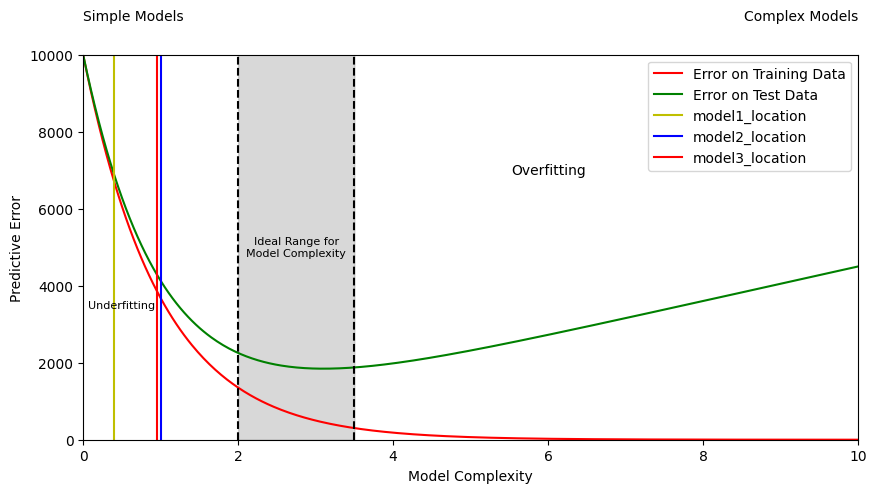

In [6]:
model_complexity = np.linspace(0, 10, 400)

training_error = 10000 * np.exp(-model_complexity) 
test_error = 10000 * np.exp(-model_complexity) + 4500 * (model_complexity / 10)

plt.figure(figsize=(10, 5))

plt.plot(model_complexity, training_error, 'r', label='Error on Training Data')
plt.plot(model_complexity, test_error, 'g', label='Error on Test Data')

plt.axvline(x=2, color='k', linestyle='--')
plt.axvline(x=3.5, color='k', linestyle='--')
plt.axvline(x=0.4, color='y', label="model1_location")
plt.axvline(x=1.0, color='b', label="model2_location")
plt.axvline(x=0.95, color='r', label="model3_location")
plt.fill_betweenx(np.arange(0, 10000), 2, 3.5, color='grey', alpha=0.3)

plt.text(2.75, 5000, 'Ideal Range for\nModel Complexity', horizontalalignment='center', verticalalignment='center', fontdict={'size': 8})
plt.text(0.5, 3500, 'Underfitting', horizontalalignment='center', verticalalignment='center', fontdict={'size': 8})
plt.text(6, 7000, 'Overfitting', horizontalalignment='center', verticalalignment='center')
plt.text(0, 11000, 'Simple Models', horizontalalignment='left', verticalalignment='center')
plt.text(10, 11000, 'Complex Models', horizontalalignment='right', verticalalignment='center')

plt.xlabel('Model Complexity')
plt.ylabel('Predictive Error')

plt.xlim(0, 10)
plt.ylim(0, 10000)
plt.legend()

plt.show()

 - log transform time taken
 - dont transform any of the other numerical data, especially price as it is bimodal distribution
 - other "numerical" data is more categorical/ordinal than quantitative
 - possibly one hot encode the destination and arrival cities, can do separately or feature engineer them as pairs and one hot encode the pairs
 - maybe add a boolean feature weekend (friday, sat, sun) or not, also is sunday 0 for day_of_week
 - change num_stops to boolean feature (ex. transfer) as there are only 0s and 1s
 - can also change month to cateogry or boolean as only feb and march (2 and 3)

# THINGS TO DO

1. Did you perform hyper parameter tuning? K-fold Cross validation? Feature expansion? What were the results?

- Performing Random Search K-fod Cross Validation did not do much, it didn't change the rmse of our intial model.

- {'pog__max_features': 2,
 'pog__min_samples_split': 14,
 'pog__n_estimators': 249}

2. What is the plan for the next model you are thinking of and why?

- Ridge Regression

3. Update your readme with this info added to the readme with links to the jupyter notebook!

- **NEED TO BE UPDATED**

4. Conclusion section: What is the conclusion of your 2nd model? What can be done to possibly improve it? How did it perform to your first and why?

- Discuss how it cut the rmse in half so it performed significantly better. We could probably change one hot encode destination and arrival cities. STuff like that

Please make sure your second model has been trained, and predictions for train, val and test are done and analyzed. 